<a href="https://colab.research.google.com/github/BIGMOUSSA/NLP_BRT_ECOMMERCE/blob/main/NLP_assessement_MDIALLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install nltk

In [ ]:
from warnings import filterwarnings

In [ ]:
import nltk
import pandas as pd
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#connectez collab et drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/NLP/ecommerceDataset.csv',names=['label','body_text'], header=None)
data.head()

,label,body_text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


###  Preprocessing
The first step in the development of any NLP model is text pre-processing. This means that we will transform our texts from word sequences into feature vectors. These feature vectors contain their values ​​for each of a large number of features.

In [ ]:
# check na
data.isna().sum()

label        0
body_text    1
dtype: int64

In [ ]:
#supprimons les valeurs manquantes
data.dropna(inplace=True)

In [ ]:
def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

In [ ]:
#séparons la base en train et test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.body_text, data.label, test_size=0.1, random_state=3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
#preprocessing = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer())])
preprocessing = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer())])
print("Preprocessing training data...")
train_preprocessed = preprocessing.fit_transform(X_train)

print("Preprocessing test data...")
test_preprocessed = preprocessing.transform(X_test)

Preprocessing training data...
Preprocessing test data...


### Training
Let's try three model and after the best 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

nb_classifier = MultinomialNB()
svm_classifier = LinearSVC()
lr_classifier = LogisticRegression(multi_class="ovr")

print("Training Naive Bayes classifier...")
nb_classifier.fit(train_preprocessed, Y_train)

print("Training SVM classifier...")
svm_classifier.fit(train_preprocessed, Y_train)

print("Training Logistic Regression classifier...")
lr_classifier.fit(train_preprocessed, Y_train)

Training Naive Bayes classifier...
Training SVM classifier...
Training Logistic Regression classifier...


LogisticRegression(multi_class='ovr')

### Predicton on test datasets

In [ ]:
nb_predictions = nb_classifier.predict(test_preprocessed)
svm_predictions = svm_classifier.predict(test_preprocessed)
lr_predictions = lr_classifier.predict(test_preprocessed)

###  Performance

In [ ]:
import numpy as np


print("NB Accuracy:", np.mean(nb_predictions == Y_test))
print("SVM Accuracy:", np.mean(svm_predictions == Y_test))
print("LR Accuracy:", np.mean(lr_predictions == Y_test))

NB Accuracy: 0.9424945468966884
SVM Accuracy: 0.9829466587348801
LR Accuracy: 0.9627206028157843


We can now interpret the accuracy of each model: the proportion of test texts for which the predicted label is the same as the target label. The Naive Bayes classifier assigned the correct label 94.2% of the time, the logistic regression model achieved 96.2% accuracy, and the Support Vector Machine obtained the correct label 98.2% of the time. What seems to be the best model

In [ ]:
target_name = Y_test.unique()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, svm_predictions, target_names=target_name))

                        precision    recall  f1-score   support

             Household       0.98      0.98      0.98      1154
Clothing & Accessories       0.99      0.99      0.99       837
                 Books       0.98      0.97      0.98      1086
           Electronics       0.98      0.99      0.98      1966

              accuracy                           0.98      5043
             macro avg       0.98      0.98      0.98      5043
          weighted avg       0.98      0.98      0.98      5043



Showing the confusius matrix show us how goog our model succes to classify the topics given word description

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

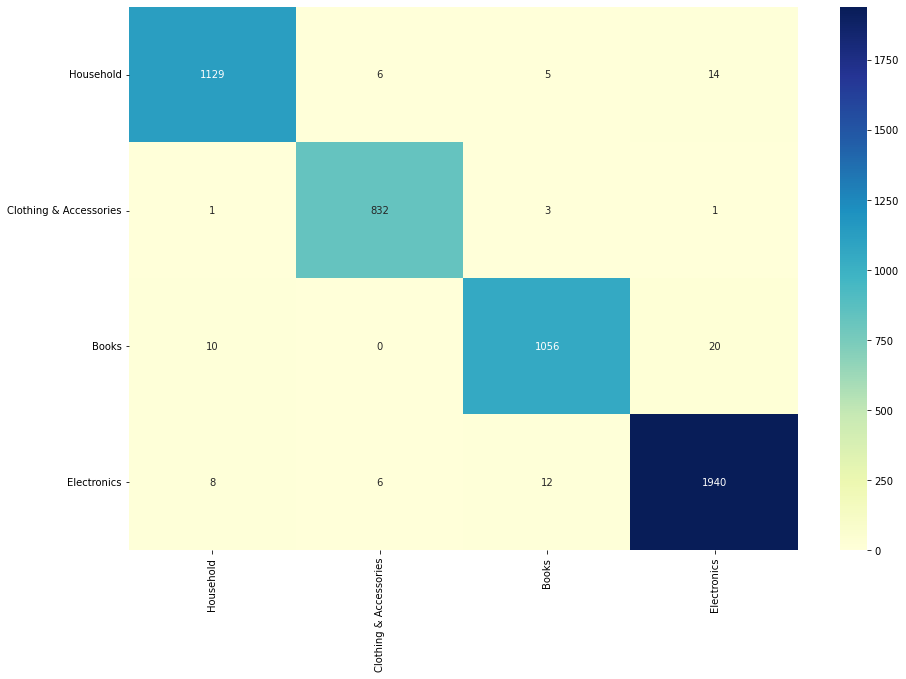

In [ ]:
%matplotlib inline
#import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(Y_test, svm_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_name, columns=target_name)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.1 MB/s 
     |████████████████████████████████| 133 kB 42.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=60d6f9b85630aa69b8bb1ba9305e2c8336dae20de2d1c54352527535fb4bff96
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


Let's find the most esentials words that lead the model to chose a label instead of other

In [ ]:
import eli5

eli5.explain_weights(svm_classifier, 
                     feature_names = preprocessing.named_steps["vect"].get_feature_names(),
                     target_names = Y_test.unique()
                    )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Explanation(estimator='LinearSVC()', description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='Household', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='fishing', weight=2.2746645820631706, std=None, value=None), FeatureWeight(feature='book', weight=2.1514635887072235, std=None, value=None), FeatureWeight(feature='author', weight=2.089388600127046, std=None, value=None), FeatureWeight(feature='how', weight=1.9501986238334423, std=None, value=None), FeatureWeight(feature='guide', weight=1.887987749434006, std=None, value=None), FeatureWeight(feature='toreto', weight=1.8547161847146778, std=None, value=None), FeatureWeight(feature='society', weight=1.8427645427126707, std=None, value=None), FeatureWeight(feature='canoeing', weight=1.8299035283203584, std=None, value=None), FeatureWeight(feature='action', weight=1.8115068701312196, std=None, value=None), FeatureWeight(feature='training', weight=1.7692756100243945, std=None, value=None), FeatureWeight(feature='boating', weight=1.7611920721025691, std=None, value=None), FeatureWeight(feature='family', weight=1.7370098510288194, std=None, value=None), FeatureWeight(feature='skateboard', weight=1.7215822752091736, std=None, value=None), FeatureWeight(feature='2019', weight=1.6745935279113366, std=None, value=None), FeatureWeight(feature='sketch', weight=1.668346155332868, std=None, value=None)], neg=[FeatureWeight(feature='12th', weight=-2.3141780872089988, std=None, value=None), FeatureWeight(feature='camera', weight=-2.009177074946019, std=None, value=None), FeatureWeight(feature='cotton', weight=-1.9064397279401395, std=None, value=None), FeatureWeight(feature='stock', weight=-1.7431493544003225, std=None, value=None), FeatureWeight(feature='discworld', weight=-1.7031170642966795, std=None, value=None)], pos_remaining=19402, neg_remaining=24798), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='Clothing & Accessories', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='women', weight=3.691196650556281, std=None, value=None), FeatureWeight(feature='men', weight=3.238193120331549, std=None, value=None), FeatureWeight(feature='sunglasses', weight=2.958988389692873, std=None, value=None), FeatureWeight(feature='bra', weight=2.893333517534153, std=None, value=None), FeatureWeight(feature='boys', weight=2.6263656869729064, std=None, value=None), FeatureWeight(feature='girls', weight=2.254705697732832, std=None, value=None), FeatureWeight(feature='shirt', weight=2.000659097670548, std=None, value=None), FeatureWeight(feature='boy', weight=1.9986299445388533, std=None, value=None), FeatureWeight(feature='unisex', weight=1.9934799388482245, std=None, value=None), FeatureWeight(feature='jacket', weight=1.977795375913382, std=None, value=None), FeatureWeight(feature='shorts', weight=1.8309049283116627, std=None, value=None), FeatureWeight(feature='socks', weight=1.784396131931056, std=None, value=None), FeatureWeight(feature='maternity', weight=1.7532402769375428, std=None, value=None), FeatureWeight(feature='formal', weight=1.6734574136921736, std=None, value=None), FeatureWeight(feature='headbands', weight=1.6601185703908345, std=None, value=None), FeatureWeight(feature='cotton', weight=1.6590344407731448, std=None, value=None), FeatureWeight(feature='scarf', weight=1.6402786342403621, std=None, value=None)], neg=[FeatureWeight(feature='bathrobe', weight=-2.8011257432239107, std=None, value=

## The END, Thanks